In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [3]:
from segment_anything import SamPredictor,sam_model_registry
model_name = 'vit_b'
model_path = 'D:/Projects/Minor Project/Parameters/SAM-Parameter/sam_vit_b_01ec64.pth'

test_image_path = 'D:/Projects/Minor Project/Datasets/raw/testings_images/'

image = cv2.imread(test_image_path + "dog2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)

sam = sam_model_registry[model_name](checkpoint=model_path)
predictor = SamPredictor(sam)
predictor.set_image(image)
image_embeddings = predictor.get_image_embedding()

scaled_h,scaled_w = predictor.input_size

features_h = scaled_h // 16
features_w = scaled_w // 16

valid_features = image_embeddings[:,:,:features_h,:features_w]

(430, 710, 3)


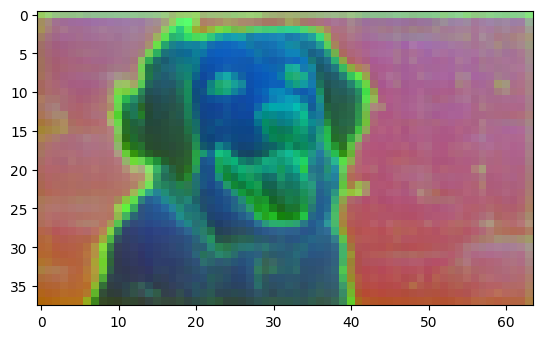

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

features = valid_features.cpu().numpy().reshape(256,-1).T

features_rgb = pca.fit_transform(features)

features_rgb = (features_rgb - features_rgb.min()) / (features_rgb.max() - features_rgb.min())\

features_rgb = features_rgb.reshape(features_h,features_w,3)

plt.imshow(features_rgb)
plt.show()

In [5]:
from nuscenes.utils.geometry_utils import view_points
from nuscenes.nuscenes import NuScenes,NuScenesExplorer
from nuscenes.utils.data_classes import LidarPointCloud
from pyquaternion import Quaternion
import os

data_path = 'D:/Projects/Minor Project/Datasets/raw/nuScenes'

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.403 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
(3, 2406)
(2406,)


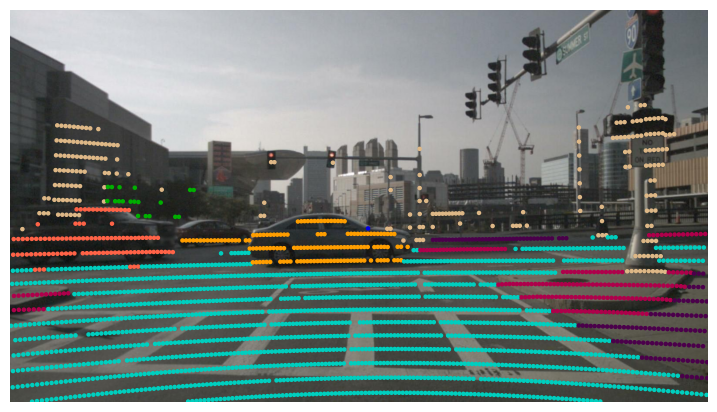

In [8]:
nusc = NuScenes(version='v1.0-mini',dataroot=data_path,verbose=True)
explorer = NuScenesExplorer(nusc)

my_sample = nusc.sample[87]

cam_token = my_sample['data']["CAM_FRONT"]
lidar_token = my_sample['data']["LIDAR_TOP"]

points,coloring,image = explorer.map_pointcloud_to_image(lidar_token,cam_token,render_intensity=False)

print(points.shape)
print(coloring.shape)

explorer.render_pointcloud_in_image(my_sample['token'],dot_size=5,render_intensity=False,show_lidarseg=True)